# See how often WaybackMachine Collects these homepages

In [4]:
from tqdm.auto import tqdm

In [644]:
import pandas as pd 
from subprocess import Popen, PIPE, check_call

sites_df = pd.read_csv('../bin/news-homepages/newshomepages/sources/sites.csv')

In [ ]:
all_output = []
for url in tqdm(sites_df['url']):
    p = Popen([
            "waybackpack", url,
            "--from-date",
            '20221201',
            "--to-date",
            '20221202',
            "--list"
    ], stdin=PIPE, stdout=PIPE, stderr=PIPE)
    output, err = p.communicate()
    
    all_output.append({'site': url, 'output': output.decode(), 'err': err.decode()})

In [52]:
all_output_df = pd.DataFrame(all_output)

In [57]:
all_output_df['err'].loc[lambda df: df != ''].shape 

(49,)

In [60]:
all_output_df = all_output_df.loc[lambda df: df['err'] == '']

In [70]:
import re
from datetime import datetime

In [ ]:
all_output_df['page_snapshot_times'] = (all_output_df['output']
 .apply(lambda x: re.findall('\d{14}', x))
 .apply(lambda x: list(map(lambda y: datetime.strptime(y, '%Y%m%d%H%M%S'), x)))
)

<AxesSubplot: >

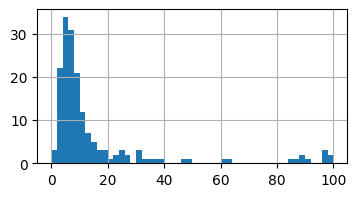

In [97]:
all_output_df['page_snapshot_times'].str.len().hist(bins=50, figsize=(4, 2), range=(0, 100))

In [112]:
all_output_df['page_snapshot_times'].str.len().value_counts().sort_index().iloc[:10]

0     2
1     1
2     4
3    18
4    18
5    16
6    16
7    15
8    10
9    11
Name: page_snapshot_times, dtype: int64

In [98]:
all_output_df.loc[lambda df: df['page_snapshot_times'].str.len() < 5]

,site,output,err,page_snapshot_times
5,https://baahrakhari.com/,https://web.archive.org/web/20221201022046/htt...,,"[2022-12-01 02:20:46, 2022-12-01 19:58:24, 202..."
7,http://fourteeneastmag.com/,https://web.archive.org/web/20221201100427/htt...,,"[2022-12-01 10:04:27, 2022-12-01 22:03:12]"
30,https://www.airlinereporter.com/,https://web.archive.org/web/20221201003605/htt...,,"[2022-12-01 00:36:05, 2022-12-02 22:03:31]"
32,https://www.dallasnews.com/espanol/al-dia/,https://web.archive.org/web/20221201100427/htt...,,"[2022-12-01 10:04:27, 2022-12-01 22:04:06, 202..."
34,https://almapreta.com/,https://web.archive.org/web/20221201125643/htt...,,"[2022-12-01 12:56:43, 2022-12-01 22:03:11, 202..."
57,https://www.binjonline.org/,https://web.archive.org/web/20221201100922/htt...,,"[2022-12-01 10:09:22, 2022-12-01 22:08:51, 202..."
71,https://blackbygod.org/,https://web.archive.org/web/20221201100848/htt...,,"[2022-12-01 10:08:48, 2022-12-01 22:09:08, 202..."
84,https://breckenridgetexan.com/,https://web.archive.org/web/20221201101103/htt...,,"[2022-12-01 10:11:03, 2022-12-02 10:10:32, 202..."
101,https://cnsmaryland.org/,https://web.archive.org/web/20221201015235/htt...,,"[2022-12-01 01:52:35, 2022-12-01 10:14:25, 202..."
111,https://atlanta.capitalbnews.org/,https://web.archive.org/web/20221201082422/htt...,,"[2022-12-01 08:24:22, 2022-12-01 10:11:47, 202..."


In [118]:
import numpy as np 

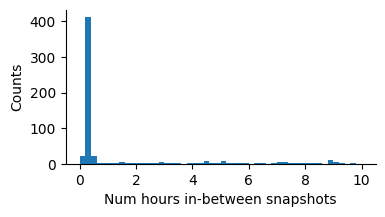

In [137]:
ax = (all_output_df['page_snapshot_times']
 .apply(lambda x: sorted(x))
 .apply(lambda x: list(map(lambda y: y[1] - y[0], zip(x[:-1], x[1:]))))
 .apply(np.mean)
 .apply(lambda x: x.total_seconds())
 .apply(lambda x: x/(60 * 60))
 .hist(bins=50, range=(0,10), figsize=(4, 2))
)
ax.set_ylabel('Counts')
ax.set_xlabel('Num hours in-between snapshots')
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [138]:
site = 'https://washingtonpost.com'

In [140]:
p = Popen([
            "waybackpack", site,
            "--from-date",
            '20221202',
            "--to-date",
            '20221203',
            "--list"
    ], stdin=PIPE, stdout=PIPE, stderr=PIPE)
output, err = p.communicate()

In [143]:
num_links = output.decode().split()

In [152]:
wp_urls = list(map(lambda x: x.split('/')[4], num_links))

In [153]:
import glob

In [155]:
retrieved_files = glob.glob('../test-scraping-methods/use-wget/web.archive.org/web/*')

In [160]:
retrieved_files = list(filter(lambda x: not x.endswith('_'), retrieved_files))

In [163]:
retrieved_files = list(map(lambda x: x.split('/')[-1], retrieved_files))

In [166]:
len(set(wp_urls) - set(retrieved_files))

246

In [168]:
len(set(wp_urls))

322

# Parse the homepages

In [5]:
ls ../scripts/

__pycache__/                     scrape_using_wget.py
artifact_cache.csv               scrape_using_wget.sh
download_data_git_archives.py    site-all.txt
get_bounding_boxes_from_html.py  site-failed.txt
js/


In [35]:
import seaborn as sns
import json 
from playwright.async_api import async_playwright
import sys
sys.path.insert(0, '../scripts/')
import get_bounding_boxes_from_html as bb
from importlib import reload 
import os
here = os.getcwd()
import glob
from datetime import datetime
reload(bb)
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from tqdm.auto import tqdm
from difflib import SequenceMatcher
from difflib import Differ
import numpy as np 

In [36]:
playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [22]:
wayback_scrape_dir = '../test-scraping-methods/use-wget/web-archive-5-days/web.archive.org'
wayback_scrape_dir = '../wayback-scrape/web.archive.org'
nyt_files = glob.glob(
    wayback_scrape_dir + '/web/*[!_]/*'
)

In [23]:
nyt_files = sorted(nyt_files, key=lambda x: x.split('/')[-3])

In [30]:
timestamp_idx = -2 # -3 if using https:/nytimes.com 
nyt_timestamps = list(map(lambda x: x.split('/')[timestamp_idx], nyt_files))
nyt_timestamps = list(map(lambda x: datetime.strptime(x, '%Y%m%d%H%M%S'),  nyt_timestamps))

In [31]:
time_diffs = (pd.Series(list(map(lambda x: x[1] - x[0], zip(nyt_timestamps[:-1], nyt_timestamps[1:]))))
#  .apply(lambda x: x.total_seconds() / (60 * 60))
)

In [32]:
for f in nyt_files:
    if not os.path.isdir(f) and (not os.path.basename(f) == 'index.html'):
        dir_path = os.path.dirname(f)
        new_path = os.path.join(dir_path, 'index.html')
        os.rename(f, new_path)
        os.makedirs(f)
        os.rename(new_path, os.path.join(f, 'index.html'))

In [33]:
nyt_files = glob.glob(
    wayback_scrape_dir + '/web/*[!_]/*nytimes.com/*'
)

In [186]:
await page.route(
    "**/*", 
    lambda route: route.abort() 
        if route.request.resource_type == "image" 
        else route.continue_() 
) 

await page.route(
    "https://web.archive.org*/*", 
    lambda route: route.abort() 
)

In [187]:
datestr_key_index = -3 # for https:/nytimes.com it's -4

all_height_width = []
all_bounding_box_dfs = []
for nyt_file in tqdm(sorted(nyt_files, key=lambda x: x.split('/')[datestr_key_index])):
    fp = os.path.join(here, nyt_file)
    datestr = fp.split('/')[datestr_key_index]
    file = f'file://{fp}'
    
    if datestr in retrieved_keys:
        continue
    
    await page.goto(file, timeout=0)
    # instantiate the model and the weights
    
    model_weights = await bb.load_model_files_and_helper_scripts(page)
    await page.evaluate(bb.instantiate_model_js % model_weights)
    await page.evaluate(bb.get_link_divs_js)
    b = await bb.get_bounding_box_info(page)
    
    all_height_width.append({
        'height': b['height'],
        'width': b['width'],
        'key': datestr
    })
    bounding_box_df = pd.DataFrame(b['bounding_boxes'])
    bounding_box_df['page_width'] = b['width']
    bounding_box_df['page_height'] = b['height']
    bounding_box_df['datestr'] = datestr
    all_bounding_box_dfs.append(bounding_box_df)

  0%|          | 0/306 [00:00<?, ?it/s]

In [188]:
files = sorted(nyt_files, key=lambda x: x.split('/')[-3])

### see if there are ways to cluster the files

In [146]:
import html
from IPython.display import display, HTML
from scipy.stats import entropy 

In [235]:
all_height_width_df = pd.DataFrame(all_height_width)

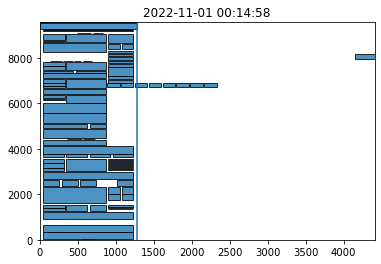

In [308]:
plot_bounding_box_df(all_bounding_box_dfs[4])

In [37]:
def cluster_df(bb_df, kmeans):
    bin_counts = transform_input_for_clustering(bb_df)
    return kmeans.predict(bin_counts.to_frame().T)[0]

In [324]:
all_width_bins = []
for bb_df in all_bounding_box_dfs:
    bin_counts = transform_input_for_clustering(bb_df, bins=bins)
    all_width_bins.append(bin_counts.to_frame())

In [28]:
from sklearn.cluster import KMeans

In [329]:
all_width_bin_df = pd.concat(all_width_bins, axis=1).T.reset_index(drop=True)

In [ ]:
kmeans = KMeans(n_clusters=2).fit(all_width_bin_df.astype(int))

In [441]:
zeros = pd.DataFrame(all_bounding_box_dfs).assign(label=kmeans.labels_).loc[lambda df: df['label'] == 0][0].tolist()

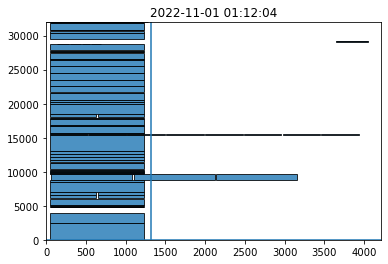

In [448]:
plot_bounding_box_df(zeros[5])

In [484]:
## clustering seems like a more scalable option
clusters = list(map(lambda x: cluster_df(x, kmeans), all_bounding_box_dfs))

In [226]:
## grouping by entropy seems to work for mobile vs. homepage layout
entropies = list(map(lambda df: df['width'].round().value_counts().pipe(entropy), all_bounding_box_dfs))

In [630]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [25]:
import sys
sys.path.insert(0, '../scripts/page_exclusions/')

In [26]:
from model_utils import ClusterAssignment

In [31]:
import pickle
with open('../scripts/page_exclusions/nytimes_predictor.pkl', 'rb') as f:
    predictor = pickle.load(f)

In [ ]:
predictor = ClusterAssignment(kmeans=kmeans, desired_cluster=1)

In [33]:
with open('../scripts/page_exclusions/nytimes_predictor.pkl', 'wb') as f:
    pickle.dump(predictor, f)

In [485]:
full_page_layout_dfs = list(filter(
    lambda df: cluster_df(df, kmeans) == 1, all_bounding_box_dfs
))

full_page_layout_dfs = list(filter(
    lambda df: df['href'].str.startswith('https://web.archive.org').any(), full_page_layout_dfs))

full_page_layout_dfs = list(map(lambda df: 
    df.loc[lambda df: df['href'].str.startswith('https://web.archive.org')]
      .assign(site_urls=lambda df: df['href'].str.split('/\d{14}/').str.get(1))
, full_page_layout_dfs))

full_page_layout_dfs = sorted(full_page_layout_dfs, key=lambda x: x.iloc[0]['datestr'])

In [486]:
wayback_links = pd.concat(full_page_layout_dfs)

In [488]:
wayback_links['site_urls'].value_counts()

https://www.nytimes.com/live/2022/11/01/world/israel-election                                                     218
https://www.nytimes.com/live/2022/11/01/us/elections-midterms                                                     217
https://www.nytimes.com/2022/10/31/world/asia/seoul-halloween-crowd-accountability.html                           195
https://theathletic.com/3740911/2022/10/31/bronny-james-recruitment-lebron-james/                                 191
https://www.nytimes.com/2022/10/31/us/pelosi-home-attack-suspect-charged.html                                     188
                                                                                                                 ... 
https://www.nytimes.com/live/2022/10/31/us/affirmative-action-supreme-court                                         1
https://theathletic.com/3744129/2022/10/30/astros-bregman-world-series-horse-racing/                                1
https://theathletic.com/3743734/2022/10/30/phillies-zack

In [660]:
t = 'https://www.nytimes.com/2022/10/31/world/asia/seoul-halloween-crowd-accountability.html'
t = 'https://www.nytimes.com/live/2022/10/31/world/brazil-election-lula-bolsonaro'
t = 'https://www.nytimes.com/live/2022/11/01/us/elections-midterms'

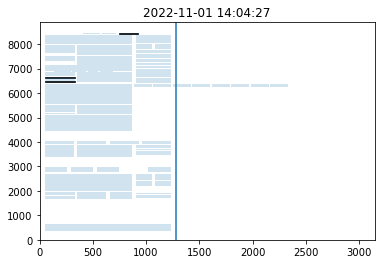

In [686]:
link_dfs = list(filter(lambda df: (df['site_urls'] == t).any(), full_page_layout_dfs))
bb_df = link_dfs[25]
plot_bounding_box_df(bb_df, t=t)

In [559]:
link_dfs[2].loc[lambda df: df['site_urls'] == t]

,href,link_text,is_article,x,y,width,height,all_text,page_width,page_height,datestr,site_urls
8,https://web.archive.org/web/20221101001458/htt...,"Brazil Election Oct. 31, 2022, 7:30 p.m. ET",True,700.078125,448.000000,133.578125,16.296875,"Brazil Election Oct. 31, 2022, 7:30 p.m. ET",1280,9636,20221101001458,https://www.nytimes.com/live/2022/10/31/world/...
34,https://web.archive.org/web/20221101001458/htt...,"LIVE Oct. 31, 2022, 7:30 p.m. ET Bolsonaro to...",True,45.906250,3974.546875,821.828125,455.359375,"LIVE Oct. 31, 2022, 7:30 p.m. ET Bolsonaro to...",1280,9636,20221101001458,https://www.nytimes.com/live/2022/10/31/world/...


In [498]:
# quantify change between webpages

In [508]:
import pickle
with open('../bin/storysniffer/model_file.pkl', 'rb') as f:
    lr_pipe = pickle.load(f)

In [517]:
import tldextract
from urllib.parse import urlparse
import re

In [526]:
def predict_articles(bb_df):
    return (
        bb_df
         .assign(domain = lambda df: df['site_urls'].apply(lambda x: tldextract.extract(x).domain))
         .assign(subdomain = lambda df: df['site_urls'].apply(lambda x: tldextract.extract(x).subdomain))
         .assign(path = lambda df: df['site_urls'].apply(lambda x: urlparse(x).path))
         .assign(num_url_parts = lambda df: 
                         df['path']
                             .apply(lambda x: re.split( '/|-', x))
                             .apply(lambda x: len(list(filter(lambda y: y != '', x))))
                )
        .assign(is_article=lambda df: lr_pipe.predict(df['path']))
    )

In [528]:
layout_df = predict_articles(full_page_layout_dfs[0])

In [530]:
bb_df_pairs = list(zip(full_page_layout_dfs[:-1], full_page_layout_dfs[1:]))

In [592]:
all_changes = []
for bb_a, bb_b in tqdm(bb_df_pairs):
    t = (
        bb.normalize_x_y_height_width(bb_a)
         [['site_urls', 'norm_x', 'norm_y', 'norm_width', 'norm_height']]
         .merge(
             bb.normalize_x_y_height_width(bb_b)[['site_urls', 'norm_x', 'norm_y', 'norm_width', 'norm_height']],
             how='outer',
             left_on='site_urls',
             right_on='site_urls'
         )
         .assign(x_diff=lambda df: df['norm_x_y'] - df['norm_x_x'])
         .assign(y_diff=lambda df: df['norm_y_y'] - df['norm_y_x']) 
         .assign(height_diff=lambda df: df['norm_height_y'] - df['norm_height_x'])
         .assign(width_diff=lambda df: df['norm_width_y'] - df['norm_width_x'])     
         .assign(is_added=lambda df: df['norm_x_x'].isnull())
         .assign(is_deleted=lambda df: df['norm_x_y'].isnull())     
         # 
         .pipe(lambda df: pd.concat([
                    df[['x_diff', 'y_diff', 'height_diff', 'width_diff']].mean(),
                    df[['is_added', 'is_deleted']].sum()
                ]))
    )
    
    t['time_diff'] = (
        datetime.strptime(bb_b['datestr'].iloc[0], '%Y%m%d%H%M%S') - 
        datetime.strptime(bb_a['datestr'].iloc[0], '%Y%m%d%H%M%S')
    )
    all_changes.append(t)

  0%|          | 0/166 [00:00<?, ?it/s]

In [609]:
all_changes_df = pd.concat(all_changes, axis=1).T

In [612]:
all_changes_df['x_diff'].abs().max()

0.046949152542372884

In [622]:
from pytimeparse.timeparse import timeparse

In [627]:
datetime.now().

datetime.datetime(2023, 2, 7, 0, 48, 45, 160403)

In [623]:
timeparse('40min')

2400

In [619]:
'https://web.archive.org/web/20221102235936/nytimes.com'.split('/')[4]

'20221102235936'

In [616]:
all_changes_df.loc[lambda df: df['y_diff'].abs().fillna(0).idxmax()]

x_diff                0.005507
y_diff                0.033043
height_diff           0.000435
width_diff           -0.010725
is_added                  13.0
is_deleted                11.0
time_diff      0 days 00:30:40
Name: 88, dtype: object

In [617]:
all_changes_df.loc[lambda df: df['x_diff'].abs().fillna(0).idxmax()]

x_diff                0.046949
y_diff               -0.002881
height_diff          -0.001017
width_diff           -0.032542
is_added                  17.0
is_deleted                22.0
time_diff      0 days 00:11:36
Name: 137, dtype: object

# Checks

In [357]:
await bb.add_visual_bounding_boxes(page)

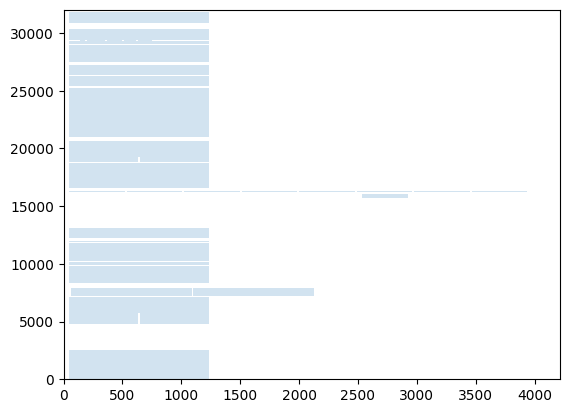

In [533]:
bb_df = all_bounding_box_dfs[12]

xmax = bb_df['x'].max()
ymax = bb_df['y'].max()

fig, ax = plt.subplots()
ax.set_ylim((0, ymax))
ax.set_xlim((0, xmax))

for i, b in bb_df.iterrows():
    ax.add_patch(Rectangle((b['x'], ymax - b['y'] - b['height']), b['width'], b['height'], alpha=.2))
plt.show()

# Slush

In [ ]:
import sys
sys.path.insert(0, '../scripts/')

reload(m)
from importlib import reload
import merge_two_dirs as m

! rm -r tmp/a
! rm -r tmp/b

! mkdir -p tmp/a/t
! touch tmp/a/t/1.txt
! touch tmp/a/t/2.txt
! touch tmp/a/t/3.txt

! mkdir -p tmp/b/t
! touch tmp/b/t/3.txt
! touch tmp/b/t/4.txt

m.main_merge('tmp/a', 'tmp/b')
ls tmp/b/t

### Try to see if there are hard-coded differences in the HTML files

In [ ]:
file_a, file_b = files[0], files[1]

html_a = open(file_a).read()

html_b = open(file_b).read()

SequenceMatcher(None, html_a, html_b).ratio()
d = Differ()

len(html_a)

len(html_b)

from lxml.html.diff import htmldiff
doc1 = '''<p>Here is some less text.</p>'''
doc2 = '''<p>Here is <b>a lot</b> of <i>text</i>.</p>'''
# print(htmldiff(doc1, doc2))

del_tag_front='<span style="background-color:rgba(255,0,0,0.3)">'
del_tag_back='</span>'
ins_tag_front='<span style="background-color:rgba(0,255,0,0.3)">'
ins_tag_back='</span>'

html_comp = htmldiff(html_a, html_b)
# html_comp = html.escape(html_comp)

escaped=False
if not escaped:
    html_comp = (html_comp
     .replace('<ins>', ins_tag_front)
     .replace('</ins>', ins_tag_back)
     .replace('<del>', del_tag_front)
     .replace('</del>', del_tag_back)
    )
else:
    html_comp = (html_comp
     .replace('&lt;ins&gt;', ins_tag_front)
     .replace('&lt;/ins&gt;', ins_tag_back)
     .replace('&lt;del&gt;', del_tag_front)
     .replace('&lt;/del&gt;', del_tag_back)
    )